In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize

## http://apmonitor.com/che263/index.php/Main/PythonDataRegression

In [42]:
boston = datasets.load_boston()
y = boston.target
X = pd.DataFrame(boston.data, columns = boston.feature_names)

In [43]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=boston.feature_names)
Xs['const'] = 1

In [28]:
Xss = Xs.copy()

In [46]:
lr = LinearRegression(fit_intercept=False)
lr.fit(Xss, y)
pd.DataFrame(list(lr.coef_), index=Xs.columns, columns=['coefs'])

,coefs
CRIM,-0.928146
ZN,1.081569
INDUS,0.140900
CHAS,0.681740
NOX,-2.056718
RM,2.674230
AGE,0.019466
DIS,-3.104044
RAD,2.662218
TAX,-2.076782


In [62]:
y_pred = lr.predict(Xss)
print('Root Means Squared Error: ', np.sqrt(mean_squared_error(y, y_pred)))
print('R-Square: ', r2_score(y, y_pred))

Root Means Squared Error:  4.679191295697282
R-Square:  0.7406426641094094


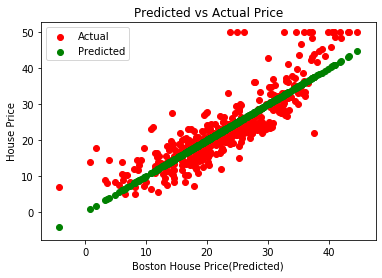

In [63]:
plt.scatter(lr.predict(Xss), y, color = "red", label='Actual')
plt.scatter(lr.predict(Xss), lr.predict(Xss), color = "green", label='Predicted')
plt.title("Predicted vs Actual Price")
plt.xlabel("Boston House Price(Predicted)")
plt.ylabel("House Price")
plt.legend()
plt.show() 

In [69]:
boston = datasets.load_boston()
y = boston.target
X = pd.DataFrame(boston.data, columns = boston.feature_names)

ss = StandardScaler()
Xs = ss.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=boston.feature_names)
Xs['const'] = 1

# calculate y
def calc_y(weights):
    yc = 0
    for i in range(Xs.shape[1]):
        yc = yc + weights[i]*Xs.iloc[:,i]
    return yc

# define objective
def objective(weights):
    return np.mean(((calc_y(weights)-y))**2)

# initial guesses
x0 = np.zeros(Xs.shape[1])

# show initial objective
print('Initial SSE Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
b = (-100, 100)
bnds = [(b)]*Xs.shape[1]
solution = minimize(objective,x0,method='SLSQP',bounds=bnds)
weights = solution.x
y_pred = calc_y(weights)

# show final objective
print('Final SSE Objective: ' + str(objective(weights)))

Initial SSE Objective: 592.1469169960473
Final SSE Objective: 21.894831519076373


In [65]:
print('Root Means Squared Error: ', np.sqrt(mean_squared_error(y, y_pred)))
print('R-Square: ', r2_score(y, y_pred))

Root Means Squared Error:  4.679191331744874
R-Square:  0.7406426601133311


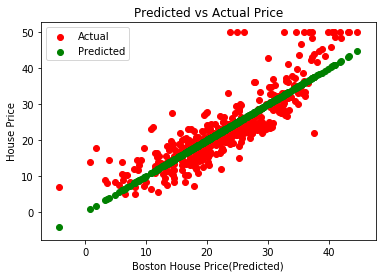

In [67]:
# plot solution
import matplotlib.pyplot as plt

plt.scatter(y_pred, y, color = "red", label='Actual')
plt.scatter(y_pred, y_pred, color = "green", label='Predicted')
plt.title("Predicted vs Actual Price")
plt.xlabel("Boston House Price(Predicted)")
plt.ylabel("House Price")
plt.legend()
plt.show() 


In [33]:
solution

     fun: 21.894831519076373
     jac: array([ 5.14984131e-05, -1.06334686e-04,  1.38998032e-04, -6.43730164e-05,
       -8.58306885e-05,  2.81333923e-05,  2.16245651e-04,  1.38998032e-04,
       -9.13143158e-05,  6.93798065e-05,  1.02281570e-04, -1.51395798e-04,
       -4.10795212e-04, -3.09944153e-05])
 message: 'Optimization terminated successfully.'
    nfev: 243
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([-9.27963609e-01,  1.08141254e+00,  1.41149929e-01,  6.81704556e-01,
       -2.05689787e+00,  2.67403329e+00,  2.00840569e-02, -3.10356986e+00,
        2.66177517e+00, -2.07635534e+00, -2.06060232e+00,  8.49091901e-01,
       -3.74436647e+00,  2.25327923e+01])

In [37]:
pd.DataFrame(solution.x, index=Xs.columns, columns=['weights'])

,weights
CRIM,-0.927964
ZN,1.081413
INDUS,0.141150
CHAS,0.681705
NOX,-2.056898
RM,2.674033
AGE,0.020084
DIS,-3.103570
RAD,2.661775
TAX,-2.076355
